In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
iris = load_iris()
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [63]:
df.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [9]:
X = df.iloc[:, :-1]
Y = iris.target

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.333)

In [21]:
Y_train

array([2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2,
       0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1])

In [57]:
# Prepruning
parameter  = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [59]:
treemodel = DecisionTreeClassifier()
cv = GridSearchCV(treemodel, param_grid=parameter, cv=5, scoring='accuracy')

In [60]:
model = cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

[Text(0.45454545454545453, 0.9166666666666666, 'x[3] <= 1.915\ngini = 0.664\nsamples = 100\nvalue = [36.0, 35.0, 29.0]'),
 Text(0.36363636363636365, 0.75, 'x[2] <= 3.373\ngini = 0.586\nsamples = 79\nvalue = [36, 35, 8]'),
 Text(0.40909090909090906, 0.8333333333333333, 'True  '),
 Text(0.18181818181818182, 0.5833333333333334, 'x[3] <= 0.733\ngini = 0.142\nsamples = 39\nvalue = [36, 3, 0]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.5454545454545454, 0.5833333333333334, 'x[0] <= 4.943\ngini = 0.32\nsamples = 40\nvalue = [0, 32, 8]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.4166666666666667, 'x[1] <= 2.274\ngini = 0.295\nsamples = 39\nvalue = [0, 32, 7]'),
 Text(0.45454545454545453, 0.25, 'x[1] <= 2.142\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(

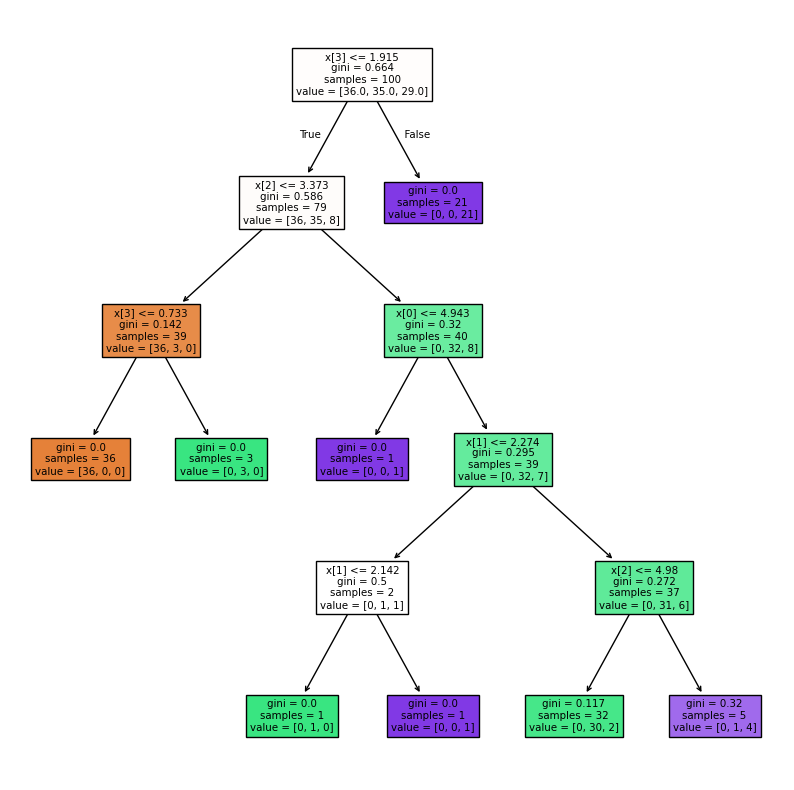

In [62]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(cv.best_estimator_, filled=True)

In [61]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [47]:
y_predict = cv.predict(X_test)

In [64]:
Y_test

array([0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0,
       1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 2])

In [48]:
y_predict

array([0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 2])

In [49]:
from sklearn.metrics import classification_report, accuracy_score

In [50]:
score = accuracy_score(y_predict, Y_test)
print(score)

0.88


In [51]:
print(classification_report(y_predict, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      0.80      0.80        15
           2       0.86      0.86      0.86        21

    accuracy                           0.88        50
   macro avg       0.89      0.89      0.89        50
weighted avg       0.88      0.88      0.88        50

